In [13]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

from datetime import timedelta
import datetime

In [14]:
air_ml_df = pd.read_csv(os.path.join("weekly_air_data.csv"))

In [15]:
air_ml_df.head(5)

,Unnamed: 0,air_area_name,visitors,current_week
0,0,Tōkyō-to Minato-ku Shibakōen,2069,0
1,1,Tōkyō-to Minato-ku Shibakōen,2092,1
2,2,Tōkyō-to Minato-ku Shibakōen,2095,2
3,3,Tōkyō-to Minato-ku Shibakōen,1999,3
4,4,Tōkyō-to Minato-ku Shibakōen,1983,4


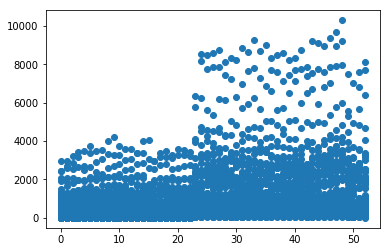

In [25]:
y = air_ml_df["visitors"]
x = air_ml_df["current_week"]

plt.scatter(x,y)

In [17]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
air_ml_df["air_area_name"] = number.fit_transform(air_ml_df["air_area_name"].astype('str'))

new_ml_df = air_ml_df[["air_area_name","current_week","visitors"]]
len(new_ml_df["air_area_name"])

5459

In [18]:
air_uni = list(new_ml_df["air_area_name"].unique())


In [20]:
new_ml_df["1_week_ago_visitors"] = 0
for x in range(len(new_ml_df["air_area_name"])):
    for air_id in air_uni:
        if(new_ml_df["air_area_name"][x] == air_id):
            if x > 0:
                new_ml_df["1_week_ago_visitors"][x] = new_ml_df["visitors"][x-1]
new_ml_df.head(5)

,air_area_name,current_week,visitors,1_week_ago_visitors
0,62,0,2069,0
1,62,1,2092,2069
2,62,2,2095,2092
3,62,3,1999,2095
4,62,4,1983,1999


In [27]:
new_ml_df["1_week_ago_diff_1_week_ago_visitors"] = new_ml_df["visitors"] - new_ml_df["1_week_ago_visitors"]

In [28]:
new_ml_df.head(10)

,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
0,62,0,2069,0,2069
1,62,1,2092,2069,23
2,62,2,2095,2092,3
3,62,3,1999,2095,-96
4,62,4,1983,1999,-16
5,62,5,2127,1983,144
6,62,6,2118,2127,-9
7,62,7,2085,2118,-33
8,62,8,2121,2085,36
9,62,9,2157,2121,36


In [29]:
clean_ml_df = new_ml_df.drop(0)

In [31]:
clean_ml_df.head(5)

,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
1,62,1,2092,2069,23
2,62,2,2095,2092,3
3,62,3,1999,2095,-96
4,62,4,1983,1999,-16
5,62,5,2127,1983,144


In [32]:
features = ['air_area_name','current_week','1_week_ago_diff_1_week_ago_visitors']
X = clean_ml_df[list(features)].values
y = clean_ml_df['visitors'].values

In [33]:
y = y.reshape(-1,1)
y.shape

(5458, 1)

In [34]:
X.shape

(5458, 3)

In [35]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [36]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

C:\Users\Eric Tsai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [37]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

C:\Users\Eric Tsai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

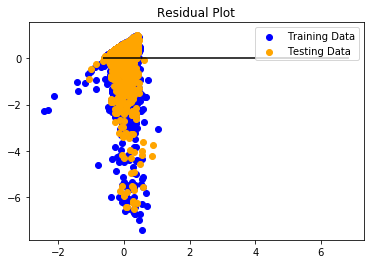

In [39]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
# model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [40]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0579387296447407, R2: 0.06685442396029306
